# Linear Regression 

In [87]:
import numpy as np
from numpy.linalg import inv, pinv
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import os

np.random.seed(42)

## Linear Regression with One Variable

### Loading Dataset

In [2]:
df = pd.read_csv(r'./HW2_Dataset/dataset1.csv')

In [3]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.shape

(97, 2)

In [5]:
X = df['x'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy().reshape(-1, 1)
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

In [6]:
X_with_bias.shape

(97, 2)

Loss history dict for latter recording of loss

In [7]:
loss_history = {'SGD':[], 'GD':[], 'Ground Truth Loss':[]}

### 1. Cost Function

$$MSE = \frac{1}{n}\sum_{i = 1}^n (y^i - \hat{y}^i)^2$$

In [8]:
def MSE(y, y_hat):
    
    return np.mean(np.square(y - y_hat))

### a. Closed Form Solution
$$\theta = (X^TX)^{-1}X^T\vec{y}$$

In [9]:
inv_XTX = inv(np.matmul(X_with_bias.T,X_with_bias))
W_c = inv_XTX @ X_with_bias.T @ y

print("W Closed Form is : ", W_c)
print("Shape of W : ", W_c.shape)

W Closed Form is :  [[-3.89578088]
 [ 1.19303364]]
Shape of W :  (2, 1)


**Closed Form Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.8957\\
\theta_1 = 1.1930
$$

### b. Stochastic Gradient Descent

In [10]:
lr: float = 1e-2
iters: int = 1500
W_sgd = np.random.rand(X_with_bias.shape[1], 1)


for iter in tqdm(range(iters)):
    for sample_idx in range(X_with_bias.shape[0]):
        x_sgd = X_with_bias[sample_idx] # a vector (1, 2)
        y_sgd = y[sample_idx] # a scalar 
        y_pred_sgd = x_sgd @ W_sgd # y hat
        
        dJ_dW = (y_sgd - y_pred_sgd) * x_sgd # Computing dJ/dw
        dJ_dW = dJ_dW.reshape(-1, 1) # reshape to be (2, 1) instead of (2, )
        W_sgd = W_sgd + lr * dJ_dW # Updating Parameters

    # Recording loss at each iteration
    y_pred = X_with_bias @ W_sgd
    loss_history['SGD'].append(MSE(y, y_pred))

100%|██████████| 1500/1500 [00:01<00:00, 1363.04it/s]


In [11]:
W_sgd

array([[-3.84815292],
       [ 1.05705257]])

**Stochastic Gradient Descent Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.8481\\
\theta_1 = 1.0570
$$

### c. Batch Gradient Descent

In [12]:
lr: float = 1e-2
epochs: int = 1500
W_gd = np.random.rand(X_with_bias.shape[1], 1)


for iter in tqdm(range(epochs)):
    y_pred_gd = X_with_bias @ W_gd 
        
    dJ_dW = (X_with_bias.T @ (y - y_pred_gd)) / len(y) # Calculating gradient in a vectorized way
        
    W_gd = W_gd + lr * dJ_dW # Updating Parameters
    
    
    # Recording loss at each epoch
    y_pred = X_with_bias @ W_gd
    loss_history['GD'].append(MSE(y, y_pred))

100%|██████████| 1500/1500 [00:00<00:00, 15492.11it/s]


In [13]:
W_gd

array([[-3.58587263],
       [ 1.1619    ]])

**Batch Gradient Descent Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.6353\\
\theta_1 = 1.1668
$$

### 3. Plot Dataset and Fitted Lines

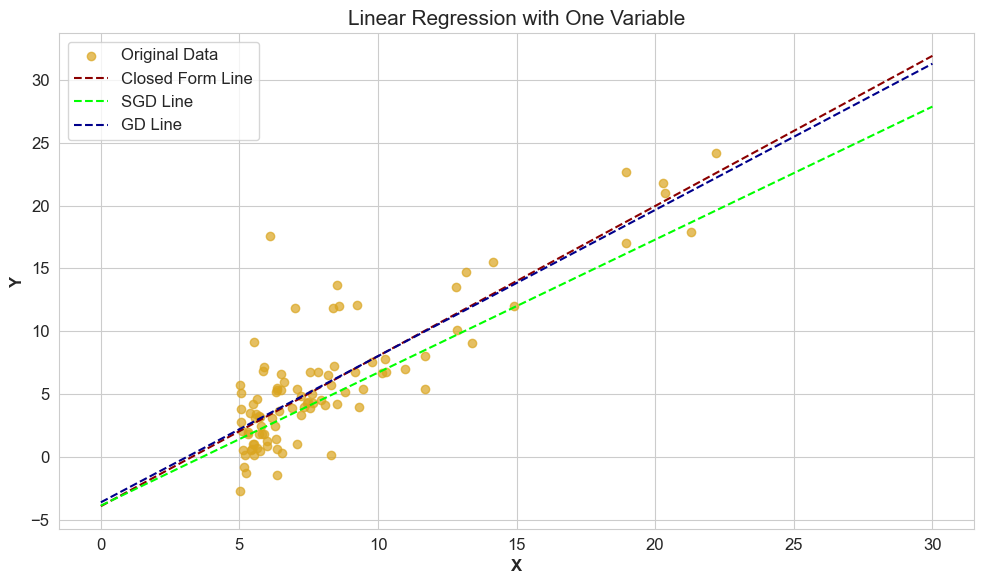

In [14]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'


# Plotting data
plt.scatter(X, y, color='goldenrod', alpha=0.7, label='Original Data')

# Plotting lines
lines = {'Closed Form': W_c.flatten(),'SGD': W_sgd.flatten(), 'GD': W_gd.flatten() }

colors = ['darkred', 'lime', 'darkblue']
for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_line = w1 + w2 * np.array([0, 30])
    
    plt.plot(np.array([0, 30]), y_line, 
             color=colors[idx], 
             linestyle='--', 
             linewidth=1.5, 
             label=f'{name} Line')

plt.title('Linear Regression with One Variable', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Prediction

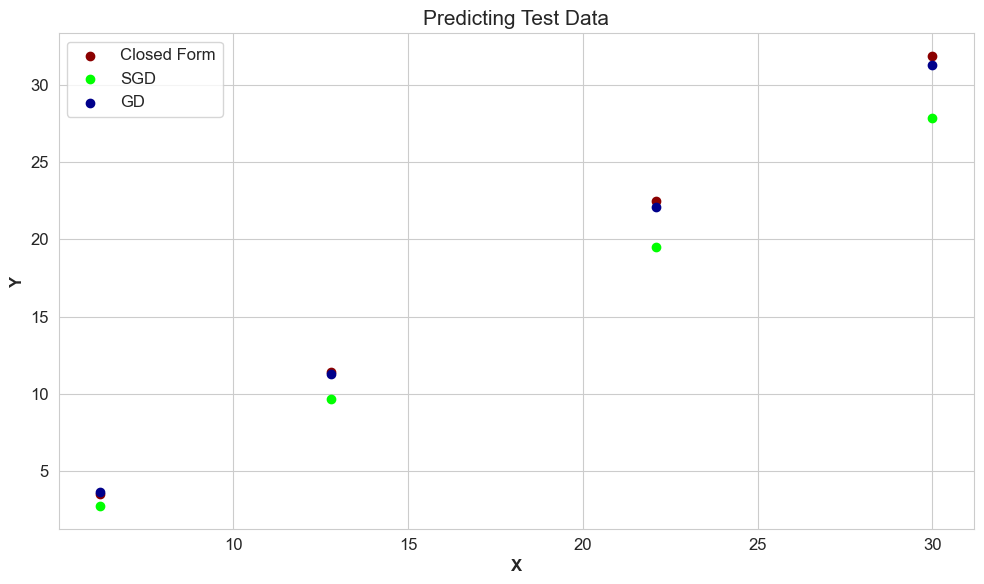

In [15]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'


colors = ['darkred', 'lime', 'darkblue']

X_test = np.array([6.2, 12.8, 22.1, 30])

for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_pred = w1 + w2 * X_test
    
    plt.scatter(X_test, y_pred, color=colors[idx], label=f'{name}')
    
    
    
plt.title('Predicting Test Data', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 5. Comparing Parameter $\theta$ of Lines

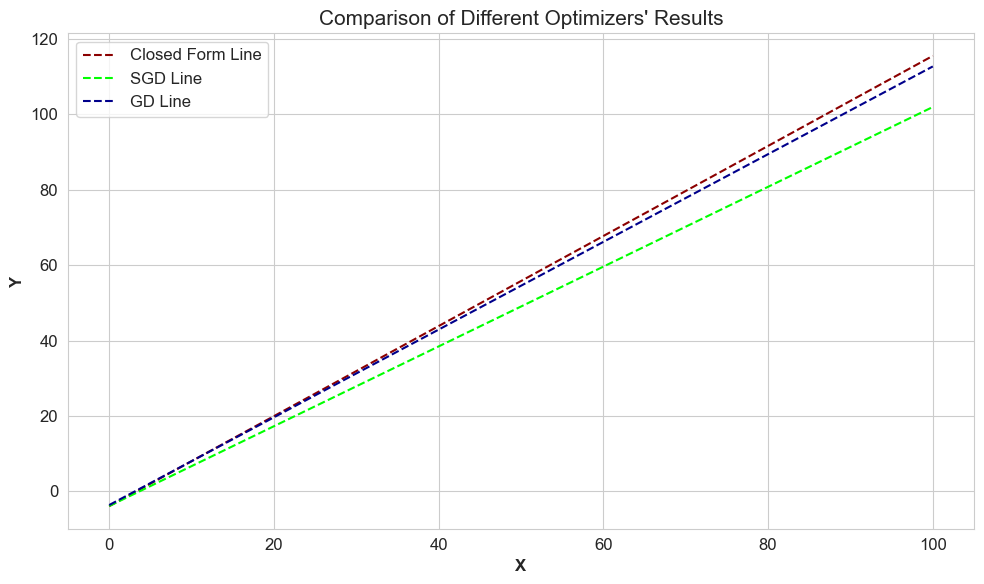

In [16]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting lines
lines = {'Closed Form': W_c.flatten(),'SGD': W_sgd.flatten(), 'GD': W_gd.flatten() }

colors = ['darkred', 'lime', 'darkblue']
for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_line = w1 + w2 * np.array([0, 100])
    
    plt.plot(np.array([0, 100]), y_line, 
             color=colors[idx], 
             linestyle='--', 
             linewidth=1.5, 
             label=f'{name} Line')

plt.title('Comparison of Different Optimizers\' Results', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 6. Plotting Cost Function

In [17]:
# Prepare and adding ground truth loss to the loss_history

y_pred_closed_form = X_with_bias @ W_c
gnd_loss = MSE(y, y_pred_closed_form)
loss_history['Ground Truth Loss'] = [gnd_loss for i in range(len(loss_history['SGD']))]

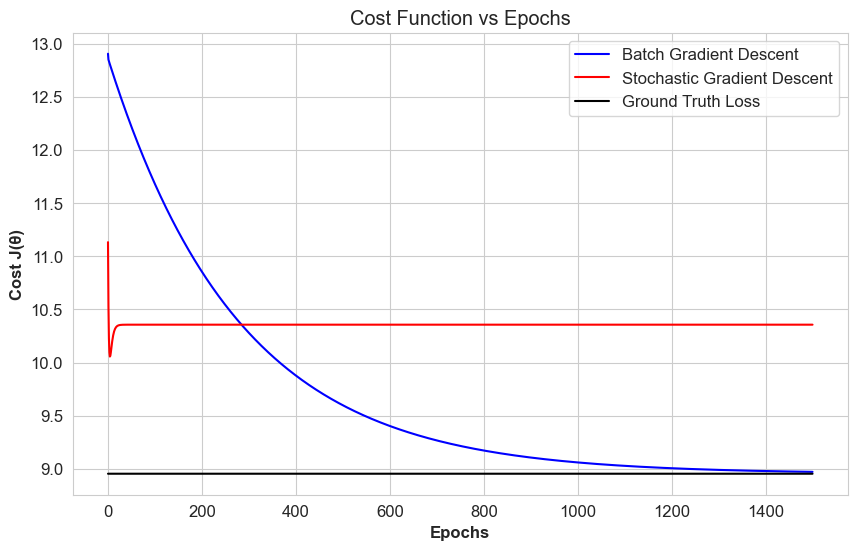

In [18]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(range(len(loss_history['GD'])), loss_history['GD'], label='Batch Gradient Descent', color='blue')
plt.plot(range(len(loss_history['SGD'])), loss_history['SGD'], label='Stochastic Gradient Descent', color='red')
plt.plot(range(len(loss_history['Ground Truth Loss'])), loss_history['Ground Truth Loss'], label='Ground Truth Loss', color='Black')

plt.xlabel('Epochs')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Epochs')
plt.legend()
plt.show()

## Multiple Variable Regression

### Loading Dataset

In [19]:
df_train = pd.read_csv(r'./HW2_Dataset/train.csv')
df_test = pd.read_csv(r'./HW2_Dataset/test.csv')

In [20]:
df_train.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df_test.head()

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   gender    1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    int64  
 1   gender    150 non-null    object 
 2   bmi       150 non-null    float64
 3   children  150 non-null    int64  
 4   smoker    150 non-null    object 
 5   region    150 non-null    object 
 6   charges   150 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.3+ KB


### Data Preprocessing

#### Encoding Categorical Features

In [24]:
# Integer Encoding
df_train['gender'] = df_train['gender'].astype('category').cat.codes
df_train['smoker'] = df_train['smoker'].astype('category').cat.codes

df_test['gender'] = df_test['gender'].astype('category').cat.codes
df_test['smoker'] = df_test['smoker'].astype('category').cat.codes

In [25]:
# OHE Encoding
df_train = pd.get_dummies(df_train, columns=['region'])
df_test = pd.get_dummies(df_test, columns=['region'])

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   int64  
 1   gender            1000 non-null   int8   
 2   bmi               1000 non-null   float64
 3   children          1000 non-null   int64  
 4   smoker            1000 non-null   int8   
 5   charges           1000 non-null   float64
 6   region_northeast  1000 non-null   bool   
 7   region_northwest  1000 non-null   bool   
 8   region_southeast  1000 non-null   bool   
 9   region_southwest  1000 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(2)
memory usage: 37.2 KB


In [27]:
# # Converting boolean columns to int
# bool_columns = df_train.select_dtypes(include=['bool']).columns

# for col in bool_columns:
#    df_train[col] = df_train[col].astype(int)
#    df_test[col] = df_test[col].astype(int)
   
# # Excluding charges from getting scaled
# scaled_columns = [col for col in df_train.columns if col != 'charges']  

# scaler = StandardScaler() # Scaler object


# df_train[scaled_columns] = scaler.fit_transform(df_train[scaled_columns])
# df_test[scaled_columns] = scaler.transform(df_test[scaled_columns])

#### $\log$ Scaling Target Column

In [28]:
df_train['charges'] = np.log(df_train['charges'])
df_test['charges'] = np.log(df_test['charges'])

In [29]:
df_train['charges'].head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

#### Squaring `bmi` Feature

In [30]:
df_train['bmi'] = df_train['bmi'] ** 2
df_test['bmi'] = df_test['bmi'] ** 2

#### Data Splitting

In [31]:
X_train = df_train.drop(columns=['charges']).to_numpy()
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

X_test = df_test.drop(columns=['charges']).to_numpy()
X_test= np.hstack([np.ones((X_test.shape[0], 1)), X_test])


y_train = df_train['charges'].to_numpy().reshape(-1, 1)
y_test = df_test['charges'].to_numpy().reshape(-1, 1)

#### Standardize Dataset

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Closed Form Solution

#### Preparing data

In [33]:
df_total = pd.concat([df_train, df_test], ignore_index=True)

In [34]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1150 non-null   int64  
 1   gender            1150 non-null   int8   
 2   bmi               1150 non-null   float64
 3   children          1150 non-null   int64  
 4   smoker            1150 non-null   int8   
 5   charges           1150 non-null   float64
 6   region_northeast  1150 non-null   bool   
 7   region_northwest  1150 non-null   bool   
 8   region_southeast  1150 non-null   bool   
 9   region_southwest  1150 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(2)
memory usage: 42.8 KB


In [35]:
X_c = df_total.drop(columns=['charges']).to_numpy()
X_c = np.hstack([np.ones((X_c.shape[0], 1)), X_c])
X_c = X_c.astype(float)

y_c = df_total['charges'].to_numpy().reshape(-1, 1)
y_c = y_c.astype(float)

#### Calculation

In [ ]:
inv_XTX = pinv(X_train.T @ X_train)
W_c = inv_XTX @ X_train.T @ y_train

print("____W in Closed Form____\n", W_c)

print("Shape of W : ", W_c.shape)



____W in Closed Form____
 [[ 0.        ]
 [ 0.51308484]
 [-0.04574074]
 [ 0.07425921]
 [ 0.12183755]
 [ 0.61220508]
 [ 0.03752162]
 [ 0.01107872]
 [-0.02806828]
 [-0.01926979]]
Shape of W :  (10, 1)


In [91]:
result_history['GD']['last_param']

array([[ 0.00000000e+00],
       [ 4.02130205e-01],
       [-2.55953583e-02],
       [ 6.88954061e-02],
       [ 9.95208854e-02],
       [ 4.71784997e-01],
       [ 3.54487599e-02],
       [ 4.46325949e-04],
       [-1.55134858e-02],
       [-1.98507105e-02]])

In [ ]:
gnd_val_loss = MSE(X_test @ W_c, y_test)
print(f'Test Error Closed Form is: {gnd_val_loss}')

Test Error Closed Form is: 84.917173146217


### Recording Results

In [37]:
result_history = {'SGD':dict(), 'GD': dict(), 'Ground Truth': dict()}

### Stochastic Gradient Descent

In [79]:
lr: float = 1e-3
iters: int = 1500
W_sgd = np.zeros((X_train.shape[1], 1)) # params init random

for slice_idx in range(10, X_train.shape[0] + 1, 10):
    print(f'_______________Number of Data used is : {slice_idx}_______________')
    # X_train_sliced = X_train[slice_idx - 10:slice_idx] # Slicing training set
    X_train_sliced = X_train[:slice_idx] # Slicing training set
    y_train_sliced = y_train[:slice_idx]
    
    W_sgd = np.zeros((X_train.shape[1], 1)) # params init random
    
    
    result_history['SGD'][slice_idx] = {'train_loss_history':np.zeros(iters), 'val_loss_history':np.zeros(iters)} # Preparation for Recording for the specific number of training samples
    
    for iter in tqdm(range(iters)):
        for sample_idx in range(X_train_sliced.shape[0]):
            x_sgd = X_train_sliced[sample_idx] # a vector (1, 10)
            y_sgd = y_train_sliced[sample_idx] # a scalar 
            y_pred_sgd = x_sgd @ W_sgd # y hat, scalar
            
            dJ_dW = (y_sgd - y_pred_sgd) * x_sgd # Computing dJ/dw
            dJ_dW = dJ_dW.reshape(-1, 1)
            W_sgd = W_sgd + lr * dJ_dW # Updating Parameters
        
        # print(W_sgd)
        # print('..................')
            
        

        
            
        # Recording train loss at each iteration
        y_pred = X_train[:slice_idx] @ W_sgd
        result_history['SGD'][slice_idx]['train_loss_history'][iter] = MSE(y_train[:slice_idx], y_pred)

        # Recording test loss at each iteration
        y_pred_test = X_test @ W_sgd
        result_history['SGD'][slice_idx]['val_loss_history'][iter] = MSE(y_test, y_pred_test)
        
result_history['SGD']['last_param'] = np.copy(W_sgd)


_______________Number of Data used is : 10_______________


100%|██████████| 1500/1500 [00:00<00:00, 9884.01it/s]


_______________Number of Data used is : 20_______________


100%|██████████| 1500/1500 [00:00<00:00, 6917.34it/s]


_______________Number of Data used is : 30_______________


100%|██████████| 1500/1500 [00:00<00:00, 4439.32it/s]


_______________Number of Data used is : 40_______________


100%|██████████| 1500/1500 [00:00<00:00, 3612.75it/s]


_______________Number of Data used is : 50_______________


100%|██████████| 1500/1500 [00:00<00:00, 2903.53it/s]


_______________Number of Data used is : 60_______________


100%|██████████| 1500/1500 [00:00<00:00, 2439.07it/s]


_______________Number of Data used is : 70_______________


100%|██████████| 1500/1500 [00:00<00:00, 2147.03it/s]


_______________Number of Data used is : 80_______________


100%|██████████| 1500/1500 [00:00<00:00, 2148.14it/s]


_______________Number of Data used is : 90_______________


100%|██████████| 1500/1500 [00:00<00:00, 1788.53it/s]


_______________Number of Data used is : 100_______________


100%|██████████| 1500/1500 [00:00<00:00, 1636.03it/s]


_______________Number of Data used is : 110_______________


100%|██████████| 1500/1500 [00:00<00:00, 1557.12it/s]


_______________Number of Data used is : 120_______________


100%|██████████| 1500/1500 [00:01<00:00, 1424.25it/s]


_______________Number of Data used is : 130_______________


100%|██████████| 1500/1500 [00:01<00:00, 1342.26it/s]


_______________Number of Data used is : 140_______________


100%|██████████| 1500/1500 [00:01<00:00, 1216.03it/s]


_______________Number of Data used is : 150_______________


100%|██████████| 1500/1500 [00:01<00:00, 1057.68it/s]


_______________Number of Data used is : 160_______________


100%|██████████| 1500/1500 [00:01<00:00, 1016.10it/s]


_______________Number of Data used is : 170_______________


100%|██████████| 1500/1500 [00:01<00:00, 912.21it/s]


_______________Number of Data used is : 180_______________


100%|██████████| 1500/1500 [00:01<00:00, 797.39it/s]


_______________Number of Data used is : 190_______________


100%|██████████| 1500/1500 [00:01<00:00, 864.17it/s]


_______________Number of Data used is : 200_______________


100%|██████████| 1500/1500 [00:01<00:00, 789.47it/s]


_______________Number of Data used is : 210_______________


100%|██████████| 1500/1500 [00:02<00:00, 625.93it/s]


_______________Number of Data used is : 220_______________


100%|██████████| 1500/1500 [00:02<00:00, 654.92it/s]


_______________Number of Data used is : 230_______________


100%|██████████| 1500/1500 [00:02<00:00, 674.23it/s]


_______________Number of Data used is : 240_______________


100%|██████████| 1500/1500 [00:01<00:00, 751.24it/s]


_______________Number of Data used is : 250_______________


100%|██████████| 1500/1500 [00:02<00:00, 697.58it/s]


_______________Number of Data used is : 260_______________


100%|██████████| 1500/1500 [00:02<00:00, 600.10it/s]


_______________Number of Data used is : 270_______________


100%|██████████| 1500/1500 [00:02<00:00, 626.45it/s]


_______________Number of Data used is : 280_______________


100%|██████████| 1500/1500 [00:02<00:00, 557.35it/s]


_______________Number of Data used is : 290_______________


100%|██████████| 1500/1500 [00:02<00:00, 550.66it/s]


_______________Number of Data used is : 300_______________


100%|██████████| 1500/1500 [00:03<00:00, 452.47it/s]


_______________Number of Data used is : 310_______________


100%|██████████| 1500/1500 [00:03<00:00, 451.84it/s]


_______________Number of Data used is : 320_______________


100%|██████████| 1500/1500 [00:03<00:00, 462.76it/s]


_______________Number of Data used is : 330_______________


100%|██████████| 1500/1500 [00:02<00:00, 516.16it/s]


_______________Number of Data used is : 340_______________


100%|██████████| 1500/1500 [00:03<00:00, 481.14it/s]


_______________Number of Data used is : 350_______________


100%|██████████| 1500/1500 [00:03<00:00, 468.79it/s]


_______________Number of Data used is : 360_______________


100%|██████████| 1500/1500 [00:03<00:00, 478.50it/s]


_______________Number of Data used is : 370_______________


100%|██████████| 1500/1500 [00:03<00:00, 376.35it/s]


_______________Number of Data used is : 380_______________


100%|██████████| 1500/1500 [00:03<00:00, 414.73it/s]


_______________Number of Data used is : 390_______________


100%|██████████| 1500/1500 [00:03<00:00, 435.43it/s]


_______________Number of Data used is : 400_______________


100%|██████████| 1500/1500 [00:04<00:00, 350.68it/s]


_______________Number of Data used is : 410_______________


100%|██████████| 1500/1500 [00:03<00:00, 391.80it/s]


_______________Number of Data used is : 420_______________


100%|██████████| 1500/1500 [00:04<00:00, 353.01it/s]


_______________Number of Data used is : 430_______________


100%|██████████| 1500/1500 [00:04<00:00, 302.24it/s]


_______________Number of Data used is : 440_______________


100%|██████████| 1500/1500 [00:04<00:00, 316.86it/s]


_______________Number of Data used is : 450_______________


100%|██████████| 1500/1500 [00:05<00:00, 289.07it/s]


_______________Number of Data used is : 460_______________


100%|██████████| 1500/1500 [00:04<00:00, 340.41it/s]


_______________Number of Data used is : 470_______________


100%|██████████| 1500/1500 [00:04<00:00, 357.96it/s]


_______________Number of Data used is : 480_______________


100%|██████████| 1500/1500 [00:04<00:00, 344.74it/s]


_______________Number of Data used is : 490_______________


100%|██████████| 1500/1500 [00:04<00:00, 345.98it/s]


_______________Number of Data used is : 500_______________


100%|██████████| 1500/1500 [00:04<00:00, 342.83it/s]


_______________Number of Data used is : 510_______________


100%|██████████| 1500/1500 [00:04<00:00, 327.24it/s]


_______________Number of Data used is : 520_______________


100%|██████████| 1500/1500 [00:04<00:00, 319.81it/s]


_______________Number of Data used is : 530_______________


100%|██████████| 1500/1500 [00:04<00:00, 307.05it/s]


_______________Number of Data used is : 540_______________


100%|██████████| 1500/1500 [00:04<00:00, 311.30it/s]


_______________Number of Data used is : 550_______________


100%|██████████| 1500/1500 [00:04<00:00, 301.84it/s]


_______________Number of Data used is : 560_______________


100%|██████████| 1500/1500 [00:04<00:00, 302.09it/s]


_______________Number of Data used is : 570_______________


100%|██████████| 1500/1500 [00:05<00:00, 260.25it/s]


_______________Number of Data used is : 580_______________


100%|██████████| 1500/1500 [00:06<00:00, 238.54it/s]


_______________Number of Data used is : 590_______________


100%|██████████| 1500/1500 [00:05<00:00, 264.62it/s]


_______________Number of Data used is : 600_______________


100%|██████████| 1500/1500 [00:05<00:00, 273.44it/s]


_______________Number of Data used is : 610_______________


100%|██████████| 1500/1500 [00:05<00:00, 270.16it/s]


_______________Number of Data used is : 620_______________


100%|██████████| 1500/1500 [00:06<00:00, 242.47it/s]


_______________Number of Data used is : 630_______________


100%|██████████| 1500/1500 [00:05<00:00, 250.72it/s]


_______________Number of Data used is : 640_______________


100%|██████████| 1500/1500 [00:06<00:00, 249.81it/s]


_______________Number of Data used is : 650_______________


100%|██████████| 1500/1500 [00:06<00:00, 241.95it/s]


_______________Number of Data used is : 660_______________


100%|██████████| 1500/1500 [00:06<00:00, 237.05it/s]


_______________Number of Data used is : 670_______________


100%|██████████| 1500/1500 [00:06<00:00, 239.90it/s]


_______________Number of Data used is : 680_______________


100%|██████████| 1500/1500 [00:06<00:00, 217.84it/s]


_______________Number of Data used is : 690_______________


100%|██████████| 1500/1500 [00:06<00:00, 218.90it/s]


_______________Number of Data used is : 700_______________


100%|██████████| 1500/1500 [00:06<00:00, 225.34it/s]


_______________Number of Data used is : 710_______________


100%|██████████| 1500/1500 [00:07<00:00, 191.72it/s]


_______________Number of Data used is : 720_______________


100%|██████████| 1500/1500 [00:07<00:00, 190.72it/s]


_______________Number of Data used is : 730_______________


100%|██████████| 1500/1500 [00:07<00:00, 202.55it/s]


_______________Number of Data used is : 740_______________


100%|██████████| 1500/1500 [00:07<00:00, 211.52it/s]


_______________Number of Data used is : 750_______________


100%|██████████| 1500/1500 [00:10<00:00, 143.50it/s]


_______________Number of Data used is : 760_______________


100%|██████████| 1500/1500 [00:08<00:00, 181.88it/s]


_______________Number of Data used is : 770_______________


100%|██████████| 1500/1500 [00:07<00:00, 201.44it/s]


_______________Number of Data used is : 780_______________


100%|██████████| 1500/1500 [00:07<00:00, 197.48it/s]


_______________Number of Data used is : 790_______________


100%|██████████| 1500/1500 [00:07<00:00, 195.55it/s]


_______________Number of Data used is : 800_______________


100%|██████████| 1500/1500 [00:07<00:00, 193.92it/s]


_______________Number of Data used is : 810_______________


100%|██████████| 1500/1500 [00:08<00:00, 183.08it/s]


_______________Number of Data used is : 820_______________


100%|██████████| 1500/1500 [00:07<00:00, 195.02it/s]


_______________Number of Data used is : 830_______________


100%|██████████| 1500/1500 [00:08<00:00, 171.56it/s]


_______________Number of Data used is : 840_______________


100%|██████████| 1500/1500 [00:08<00:00, 174.10it/s]


_______________Number of Data used is : 850_______________


100%|██████████| 1500/1500 [00:08<00:00, 184.74it/s]


_______________Number of Data used is : 860_______________


100%|██████████| 1500/1500 [00:08<00:00, 185.16it/s]


_______________Number of Data used is : 870_______________


100%|██████████| 1500/1500 [00:08<00:00, 179.92it/s]


_______________Number of Data used is : 880_______________


100%|██████████| 1500/1500 [00:08<00:00, 175.83it/s]


_______________Number of Data used is : 890_______________


100%|██████████| 1500/1500 [00:08<00:00, 174.24it/s]


_______________Number of Data used is : 900_______________


100%|██████████| 1500/1500 [00:08<00:00, 167.00it/s]


_______________Number of Data used is : 910_______________


100%|██████████| 1500/1500 [00:09<00:00, 166.61it/s]


_______________Number of Data used is : 920_______________


100%|██████████| 1500/1500 [00:08<00:00, 167.55it/s]


_______________Number of Data used is : 930_______________


100%|██████████| 1500/1500 [00:09<00:00, 163.99it/s]


_______________Number of Data used is : 940_______________


100%|██████████| 1500/1500 [00:09<00:00, 160.01it/s]


_______________Number of Data used is : 950_______________


100%|██████████| 1500/1500 [00:09<00:00, 160.69it/s]


_______________Number of Data used is : 960_______________


100%|██████████| 1500/1500 [00:09<00:00, 158.39it/s]


_______________Number of Data used is : 970_______________


100%|██████████| 1500/1500 [00:09<00:00, 154.52it/s]


_______________Number of Data used is : 980_______________


100%|██████████| 1500/1500 [00:09<00:00, 152.70it/s]


_______________Number of Data used is : 990_______________


100%|██████████| 1500/1500 [00:10<00:00, 142.35it/s]


_______________Number of Data used is : 1000_______________


100%|██████████| 1500/1500 [00:10<00:00, 137.85it/s]


#### Plotting the Full Data Training

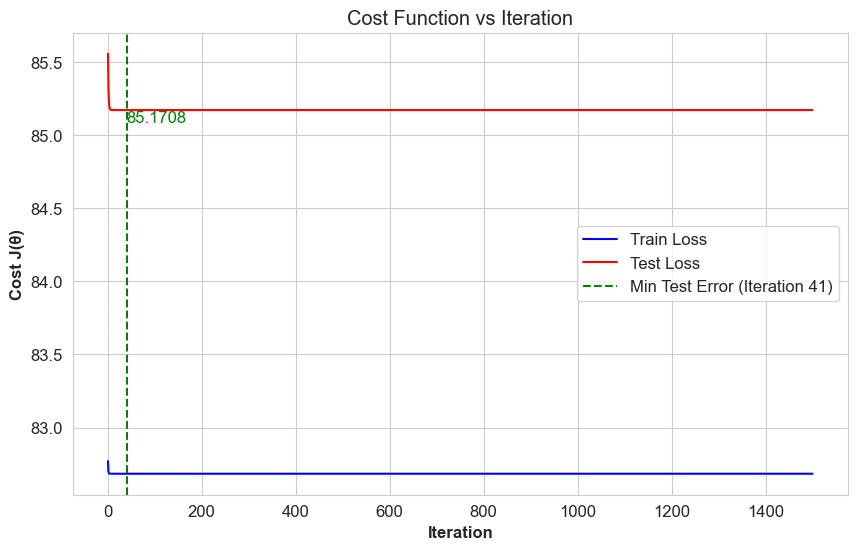

In [80]:
train_loss_history = result_history['SGD'][1000]['train_loss_history']
val_loss_history = result_history['SGD'][1000]['val_loss_history']
iterss = np.arange(1, 1500 + 1)

min_val_loss = val_loss_history.min()
iteration_min_loss = np.argmin(val_loss_history) + 1

# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iterss, train_loss_history, label='Train Loss', color='blue')
plt.plot(iterss, val_loss_history, label='Test Loss', color='red')

plt.axvline(x=iteration_min_loss, color="green", linestyle="--", label=f"Min Test Error (Iteration {iteration_min_loss})")
plt.text(
    iteration_min_loss,  # x-coordinate
    min_val_loss,        # y-coordinate
    f"{min_val_loss:.4f}",  
    color="green",
    fontsize=12,
    ha="left",  
    va="top"  
)

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

#### Plotting Mean Test Error vs Train Data size

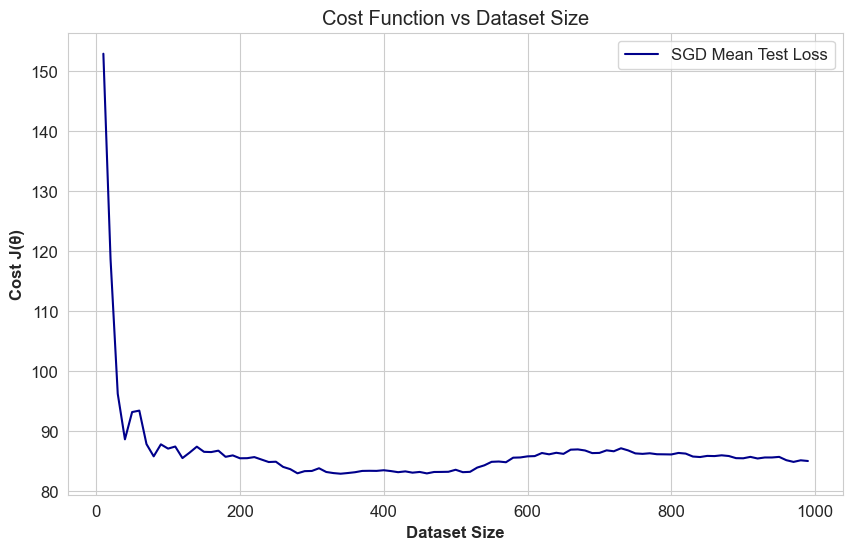

In [82]:
dataset_size = np.arange(10, X_train.shape[0], 10)

mean_val_loss = np.array([np.mean(result_history['SGD'][size]['val_loss_history']) for size in dataset_size])


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, mean_val_loss, label='SGD Mean Test Loss', color='darkblue')

plt.xlabel('Dataset Size')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Dataset Size')
plt.legend()
plt.show()

### Batch Gradient Descent

In [51]:
lr: float = 1e-3
epochs: int = 1500

W_gd = np.zeros((X_train.shape[1], 1)) # params init random

for slice_idx in range(10, X_train.shape[0] + 1, 10):
    print(f'_______________Number of Data used is : {slice_idx}_______________')
    
    W_gd = np.zeros((X_train.shape[1], 1)) # params init random
    X_train_sliced = X_train[:slice_idx] # Slicing training set
    y_sliced = y_train[:slice_idx]
    
    result_history['GD'][slice_idx] = {'train_loss_history':np.zeros(epochs), 'val_loss_history':np.zeros(epochs)} # Preparation for Recording for the specific number of training samples

    for iter in tqdm(range(epochs)):
        y_pred_gd = X_train_sliced @ W_gd 
            
        dJ_dW = (X_train_sliced.T @ (y_sliced - y_pred_gd)) / len(y_sliced) # Calculating gradient in a vectorized way
            
        W_gd = W_gd + lr * dJ_dW # Updating Parameters
        
        
        
       # Recording train loss at each iteration
        y_pred = X_train[:slice_idx] @ W_gd
        result_history['GD'][slice_idx]['train_loss_history'][iter] = MSE(y_train[:slice_idx], y_pred)

        # Recording test loss at each iteration
        y_pred_test = X_test @ W_gd
        result_history['GD'][slice_idx]['val_loss_history'][iter] = MSE(y_test, y_pred_test)
        
result_history['GD']['last_param'] = np.copy(W_gd)


_______________Number of Data used is : 10_______________


100%|██████████| 1500/1500 [00:00<00:00, 19067.62it/s]


_______________Number of Data used is : 20_______________


100%|██████████| 1500/1500 [00:00<00:00, 37019.23it/s]


_______________Number of Data used is : 30_______________


100%|██████████| 1500/1500 [00:00<00:00, 44888.95it/s]

_______________Number of Data used is : 40_______________



100%|██████████| 1500/1500 [00:00<00:00, 16545.49it/s]


_______________Number of Data used is : 50_______________


100%|██████████| 1500/1500 [00:00<00:00, 28830.66it/s]


_______________Number of Data used is : 60_______________


100%|██████████| 1500/1500 [00:00<00:00, 30265.72it/s]

_______________Number of Data used is : 70_______________



100%|██████████| 1500/1500 [00:00<00:00, 30716.40it/s]


_______________Number of Data used is : 80_______________


100%|██████████| 1500/1500 [00:00<00:00, 28771.07it/s]


_______________Number of Data used is : 90_______________


100%|██████████| 1500/1500 [00:00<00:00, 28561.44it/s]


_______________Number of Data used is : 100_______________


100%|██████████| 1500/1500 [00:00<00:00, 31539.28it/s]


_______________Number of Data used is : 110_______________


100%|██████████| 1500/1500 [00:00<00:00, 30554.84it/s]


_______________Number of Data used is : 120_______________


100%|██████████| 1500/1500 [00:00<00:00, 29567.47it/s]


_______________Number of Data used is : 130_______________


100%|██████████| 1500/1500 [00:00<00:00, 17204.91it/s]


_______________Number of Data used is : 140_______________


100%|██████████| 1500/1500 [00:00<00:00, 24550.20it/s]


_______________Number of Data used is : 150_______________


100%|██████████| 1500/1500 [00:00<00:00, 30606.57it/s]


_______________Number of Data used is : 160_______________


100%|██████████| 1500/1500 [00:00<00:00, 42596.47it/s]


_______________Number of Data used is : 170_______________


100%|██████████| 1500/1500 [00:00<00:00, 29030.34it/s]


_______________Number of Data used is : 180_______________


100%|██████████| 1500/1500 [00:00<00:00, 30419.81it/s]


_______________Number of Data used is : 190_______________


100%|██████████| 1500/1500 [00:00<00:00, 22219.67it/s]


_______________Number of Data used is : 200_______________


100%|██████████| 1500/1500 [00:00<00:00, 31077.97it/s]


_______________Number of Data used is : 210_______________


100%|██████████| 1500/1500 [00:00<00:00, 29920.70it/s]


_______________Number of Data used is : 220_______________


100%|██████████| 1500/1500 [00:00<00:00, 29954.04it/s]


_______________Number of Data used is : 230_______________


100%|██████████| 1500/1500 [00:00<00:00, 29891.70it/s]


_______________Number of Data used is : 240_______________


100%|██████████| 1500/1500 [00:00<00:00, 28572.46it/s]


_______________Number of Data used is : 250_______________


100%|██████████| 1500/1500 [00:00<00:00, 30477.43it/s]


_______________Number of Data used is : 260_______________


100%|██████████| 1500/1500 [00:00<00:00, 30354.21it/s]


_______________Number of Data used is : 270_______________


100%|██████████| 1500/1500 [00:00<00:00, 34296.52it/s]


_______________Number of Data used is : 280_______________


100%|██████████| 1500/1500 [00:00<00:00, 20163.37it/s]


_______________Number of Data used is : 290_______________


100%|██████████| 1500/1500 [00:00<00:00, 23021.51it/s]


_______________Number of Data used is : 300_______________


100%|██████████| 1500/1500 [00:00<00:00, 26808.66it/s]


_______________Number of Data used is : 310_______________


100%|██████████| 1500/1500 [00:00<00:00, 23188.92it/s]


_______________Number of Data used is : 320_______________


100%|██████████| 1500/1500 [00:00<00:00, 22446.56it/s]


_______________Number of Data used is : 330_______________


100%|██████████| 1500/1500 [00:00<00:00, 29672.48it/s]


_______________Number of Data used is : 340_______________


100%|██████████| 1500/1500 [00:00<00:00, 22317.17it/s]


_______________Number of Data used is : 350_______________


100%|██████████| 1500/1500 [00:00<00:00, 31918.83it/s]


_______________Number of Data used is : 360_______________


100%|██████████| 1500/1500 [00:00<00:00, 29478.40it/s]


_______________Number of Data used is : 370_______________


100%|██████████| 1500/1500 [00:00<00:00, 29941.06it/s]


_______________Number of Data used is : 380_______________


100%|██████████| 1500/1500 [00:00<00:00, 29968.45it/s]


_______________Number of Data used is : 390_______________


100%|██████████| 1500/1500 [00:00<00:00, 28295.28it/s]


_______________Number of Data used is : 400_______________


100%|██████████| 1500/1500 [00:00<00:00, 30671.18it/s]


_______________Number of Data used is : 410_______________


100%|██████████| 1500/1500 [00:00<00:00, 21729.07it/s]


_______________Number of Data used is : 420_______________


100%|██████████| 1500/1500 [00:00<00:00, 18385.00it/s]


_______________Number of Data used is : 430_______________


100%|██████████| 1500/1500 [00:00<00:00, 22969.90it/s]


_______________Number of Data used is : 440_______________


100%|██████████| 1500/1500 [00:00<00:00, 17929.59it/s]


_______________Number of Data used is : 450_______________


100%|██████████| 1500/1500 [00:00<00:00, 24769.90it/s]


_______________Number of Data used is : 460_______________


100%|██████████| 1500/1500 [00:00<00:00, 28057.55it/s]


_______________Number of Data used is : 470_______________


100%|██████████| 1500/1500 [00:00<00:00, 22803.72it/s]


_______________Number of Data used is : 480_______________


100%|██████████| 1500/1500 [00:00<00:00, 29353.92it/s]


_______________Number of Data used is : 490_______________


100%|██████████| 1500/1500 [00:00<00:00, 22549.29it/s]


_______________Number of Data used is : 500_______________


100%|██████████| 1500/1500 [00:00<00:00, 29857.23it/s]


_______________Number of Data used is : 510_______________


100%|██████████| 1500/1500 [00:00<00:00, 29946.91it/s]


_______________Number of Data used is : 520_______________


100%|██████████| 1500/1500 [00:00<00:00, 23046.64it/s]


_______________Number of Data used is : 530_______________


100%|██████████| 1500/1500 [00:00<00:00, 28697.71it/s]


_______________Number of Data used is : 540_______________


100%|██████████| 1500/1500 [00:00<00:00, 29340.37it/s]


_______________Number of Data used is : 550_______________


100%|██████████| 1500/1500 [00:00<00:00, 22559.89it/s]


_______________Number of Data used is : 560_______________


100%|██████████| 1500/1500 [00:00<00:00, 23190.29it/s]


_______________Number of Data used is : 570_______________


100%|██████████| 1500/1500 [00:00<00:00, 22419.68it/s]


_______________Number of Data used is : 580_______________


100%|██████████| 1500/1500 [00:00<00:00, 22423.12it/s]


_______________Number of Data used is : 590_______________


100%|██████████| 1500/1500 [00:00<00:00, 22274.82it/s]


_______________Number of Data used is : 600_______________


100%|██████████| 1500/1500 [00:00<00:00, 29744.16it/s]


_______________Number of Data used is : 610_______________


100%|██████████| 1500/1500 [00:00<00:00, 30172.39it/s]


_______________Number of Data used is : 620_______________


100%|██████████| 1500/1500 [00:00<00:00, 28862.01it/s]


_______________Number of Data used is : 630_______________


100%|██████████| 1500/1500 [00:00<00:00, 22734.83it/s]


_______________Number of Data used is : 640_______________


100%|██████████| 1500/1500 [00:00<00:00, 22576.81it/s]


_______________Number of Data used is : 650_______________


100%|██████████| 1500/1500 [00:00<00:00, 22081.41it/s]


_______________Number of Data used is : 660_______________


100%|██████████| 1500/1500 [00:00<00:00, 22885.26it/s]


_______________Number of Data used is : 670_______________


100%|██████████| 1500/1500 [00:00<00:00, 18915.64it/s]


_______________Number of Data used is : 680_______________


100%|██████████| 1500/1500 [00:00<00:00, 18980.24it/s]


_______________Number of Data used is : 690_______________


100%|██████████| 1500/1500 [00:00<00:00, 20466.61it/s]


_______________Number of Data used is : 700_______________


100%|██████████| 1500/1500 [00:00<00:00, 17996.77it/s]


_______________Number of Data used is : 710_______________


100%|██████████| 1500/1500 [00:00<00:00, 18030.76it/s]


_______________Number of Data used is : 720_______________


100%|██████████| 1500/1500 [00:00<00:00, 17939.15it/s]


_______________Number of Data used is : 730_______________


100%|██████████| 1500/1500 [00:00<00:00, 16565.71it/s]


_______________Number of Data used is : 740_______________


100%|██████████| 1500/1500 [00:00<00:00, 17853.37it/s]


_______________Number of Data used is : 750_______________


100%|██████████| 1500/1500 [00:00<00:00, 22801.90it/s]


_______________Number of Data used is : 760_______________


100%|██████████| 1500/1500 [00:00<00:00, 17961.37it/s]


_______________Number of Data used is : 770_______________


100%|██████████| 1500/1500 [00:00<00:00, 17907.49it/s]


_______________Number of Data used is : 780_______________


100%|██████████| 1500/1500 [00:00<00:00, 18133.45it/s]


_______________Number of Data used is : 790_______________


100%|██████████| 1500/1500 [00:00<00:00, 17909.94it/s]


_______________Number of Data used is : 800_______________


100%|██████████| 1500/1500 [00:00<00:00, 12887.55it/s]


_______________Number of Data used is : 810_______________


100%|██████████| 1500/1500 [00:00<00:00, 12509.71it/s]


_______________Number of Data used is : 820_______________


100%|██████████| 1500/1500 [00:00<00:00, 9571.08it/s]


_______________Number of Data used is : 830_______________


100%|██████████| 1500/1500 [00:00<00:00, 17266.57it/s]


_______________Number of Data used is : 840_______________


100%|██████████| 1500/1500 [00:00<00:00, 17001.64it/s]


_______________Number of Data used is : 850_______________


100%|██████████| 1500/1500 [00:00<00:00, 12599.90it/s]


_______________Number of Data used is : 860_______________


100%|██████████| 1500/1500 [00:00<00:00, 19697.18it/s]


_______________Number of Data used is : 870_______________


100%|██████████| 1500/1500 [00:00<00:00, 19687.93it/s]


_______________Number of Data used is : 880_______________


100%|██████████| 1500/1500 [00:00<00:00, 20361.95it/s]


_______________Number of Data used is : 890_______________


100%|██████████| 1500/1500 [00:00<00:00, 19885.19it/s]


_______________Number of Data used is : 900_______________


100%|██████████| 1500/1500 [00:00<00:00, 20112.51it/s]


_______________Number of Data used is : 910_______________


100%|██████████| 1500/1500 [00:00<00:00, 21288.22it/s]


_______________Number of Data used is : 920_______________


100%|██████████| 1500/1500 [00:00<00:00, 18055.03it/s]


_______________Number of Data used is : 930_______________


100%|██████████| 1500/1500 [00:00<00:00, 12866.04it/s]


_______________Number of Data used is : 940_______________


100%|██████████| 1500/1500 [00:00<00:00, 19514.99it/s]


_______________Number of Data used is : 950_______________


100%|██████████| 1500/1500 [00:00<00:00, 20069.66it/s]


_______________Number of Data used is : 960_______________


100%|██████████| 1500/1500 [00:00<00:00, 19905.95it/s]


_______________Number of Data used is : 970_______________


100%|██████████| 1500/1500 [00:00<00:00, 21006.74it/s]


_______________Number of Data used is : 980_______________


100%|██████████| 1500/1500 [00:00<00:00, 19568.77it/s]


_______________Number of Data used is : 990_______________


100%|██████████| 1500/1500 [00:00<00:00, 18149.77it/s]


_______________Number of Data used is : 1000_______________


100%|██████████| 1500/1500 [00:00<00:00, 20765.11it/s]


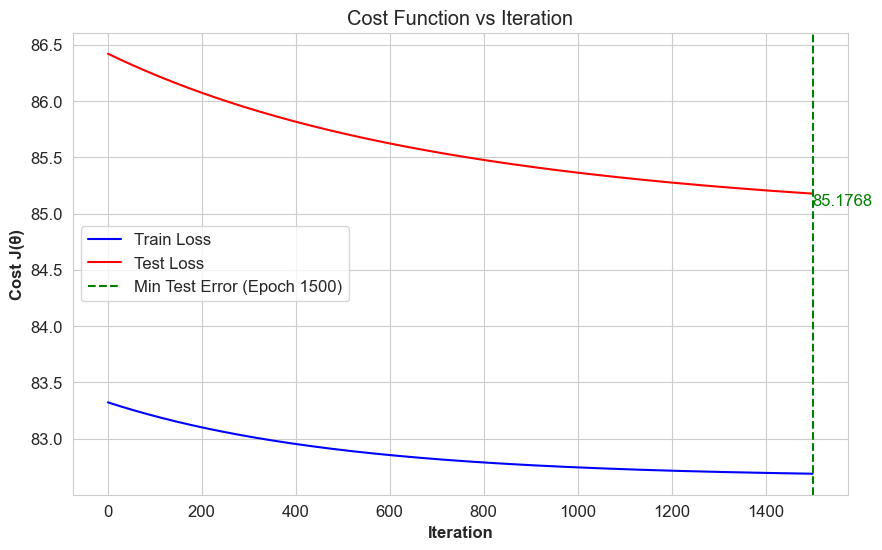

In [83]:
train_loss_history = result_history['GD'][1000]['train_loss_history']
val_loss_history = result_history['GD'][1000]['val_loss_history']
iterss = np.arange(1, epochs + 1)

min_val_loss = val_loss_history.min()
iteration_min_loss = np.argmin(val_loss_history) + 1

# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iterss, train_loss_history, label='Train Loss', color='blue')
plt.plot(iterss, val_loss_history, label='Test Loss', color='red')

plt.axvline(x=iteration_min_loss, color="green", linestyle="--", label=f"Min Test Error (Epoch {iteration_min_loss})")
plt.text(
    iteration_min_loss,  # x-coordinate
    min_val_loss,        # y-coordinate
    f"{min_val_loss:.4f}",  
    color="green",
    fontsize=12,
    ha="left",  
    va="top"  
)

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

#### Plotting Mean Test Error vs Train Data size

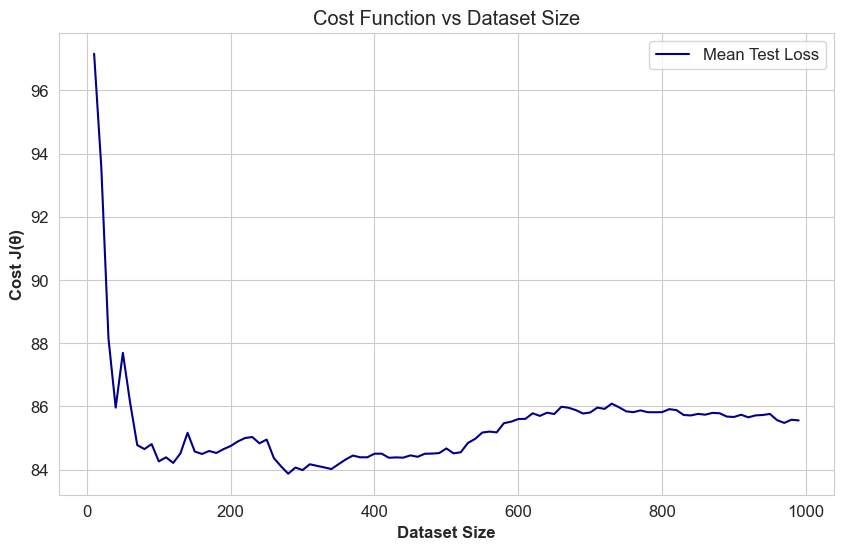

In [84]:
dataset_size = np.arange(10, X_train.shape[0], 10)

mean_val_loss = np.array([np.mean(result_history['GD'][size]['val_loss_history']) for size in dataset_size])


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, mean_val_loss, label='Mean Test Loss', color='darkblue')

plt.xlabel('Dataset Size')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Dataset Size')
plt.legend()
plt.show()

### Comparsion of Test error For Three Approaches

Test Error Closed Form is: 84.917173146217


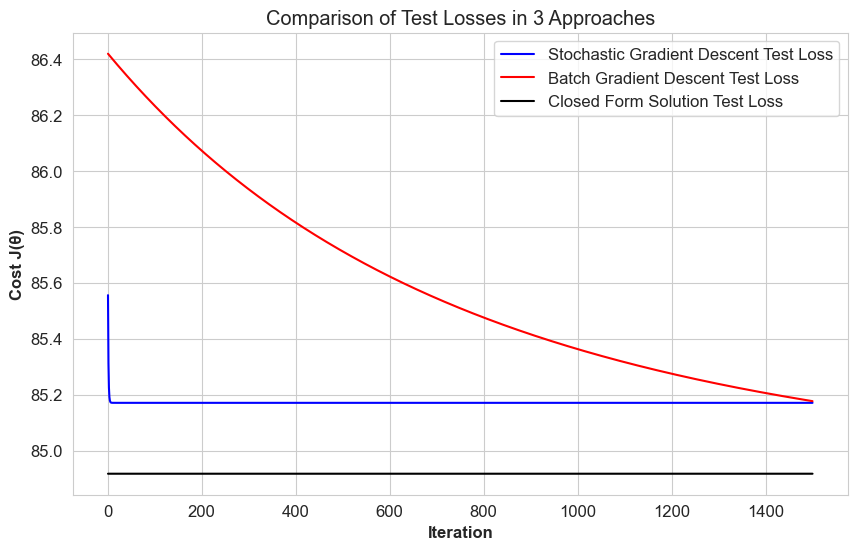

In [95]:
sgd_val_loss_history = result_history['SGD'][1000]['val_loss_history']

gd_val_loss_history = result_history['GD'][1000]['val_loss_history']



gnd_val_loss = MSE(X_test @ W_c, y_test)
print(f'Test Error Closed Form is: {gnd_val_loss}')
ground_truth_loss = np.array([gnd_val_loss for i in range(epochs)])

iterss = np.arange(1, epochs + 1)


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iterss, sgd_val_loss_history, label='Stochastic Gradient Descent Test Loss', color='blue')
plt.plot(iterss, gd_val_loss_history, label='Batch Gradient Descent Test Loss', color='red')
plt.plot(iterss, ground_truth_loss, label='Closed Form Solution Test Loss', color='black')



plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Comparison of Test Losses in 3 Approaches')
plt.legend()
plt.show()

### Adding $L_2$ Regularization

### sheet

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def compare_bmi_scaling(bmi_values):
    """
    Compares different scaling methods for BMI squared values and visualizes the results.
    
    Parameters:
    bmi_values (numpy.ndarray): Original BMI values
    
    Returns:
    dict: Dictionary containing scaled values using different methods
    """
    # Calculate BMI squared
    bmi_squared = bmi_values ** 2
    print(bmi_squared.shape)
    # Standard scaling
    scaler = StandardScaler()
    standard_scaled = scaler.fit_transform(bmi_squared.reshape(-1, 1)).flatten()
    print(standard_scaled.shape)
    
    # Log transformation (adding 1 to handle zeros)
    log_scaled = np.log1p(bmi_squared)
    
    # Create visualizations
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original BMI squared distribution
    ax1.hist(bmi_squared, bins=30)
    ax1.set_title('Original BMI²')
    ax1.set_ylabel('Frequency')
    
    # Standard scaled distribution
    ax2.hist(standard_scaled, bins=30)
    ax2.set_title('StandardScaler BMI²')
    
    # Log scaled distribution
    ax3.hist(log_scaled, bins=30)
    ax3.set_title('Log BMI²')
    
    plt.tight_layout()
    
    # Calculate statistics
    stats = {
        'original': {
            'mean': np.mean(bmi_squared),
            'std': np.std(bmi_squared),
            'skew': np.mean(((bmi_squared - np.mean(bmi_squared))/np.std(bmi_squared))**3)
        },
        'standard': {
            'mean': np.mean(standard_scaled),
            'std': np.std(standard_scaled),
            'skew': np.mean(((standard_scaled - np.mean(standard_scaled))/np.std(standard_scaled))**3)
        },
        'log': {
            'mean': np.mean(log_scaled),
            'std': np.std(log_scaled),
            'skew': np.mean(((log_scaled - np.mean(log_scaled))/np.std(log_scaled))**3)
        }
    }
    
    return {
        'standard_scaled': standard_scaled,
        'log_scaled': log_scaled,
        'stats': stats
    }


(1150,)
(1150,)

Distribution Statistics:

Original:
Mean: 1115958.744
Std: 907707.048
Skewness: 2.056

Standard:
Mean: 0.000
Std: 1.000
Skewness: 2.056

Log:
Mean: 13.624
Std: 0.808
Skewness: -0.290


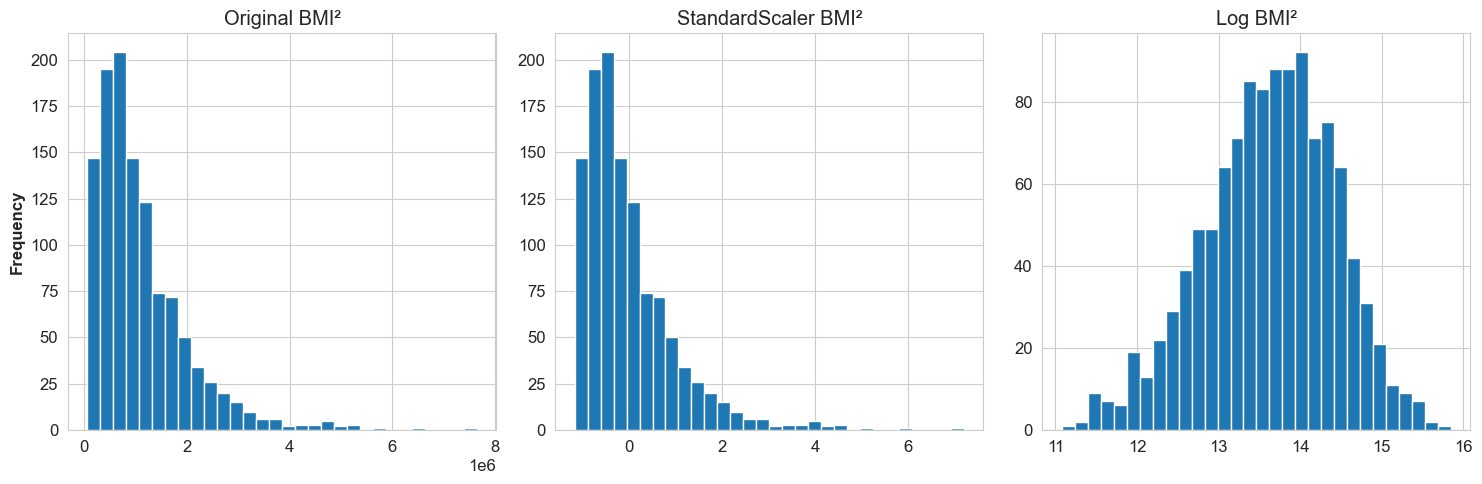

In [272]:
# Assuming bmi_values is your array of BMI values
results = compare_bmi_scaling(df_total['bmi'].to_numpy())
print("\nDistribution Statistics:")
for method, stats in results['stats'].items():
    print(f"\n{method.capitalize()}:")
    print(f"Mean: {stats['mean']:.3f}")
    print(f"Std: {stats['std']:.3f}")
    print(f"Skewness: {stats['skew']:.3f}")